<a href="https://www.kaggle.com/code/hossamahmedsalah/titank-ii?scriptVersionId=126600172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Define the study case 
* the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate 
* some groups of people were more likely to survive than others, such as women, children, and the upper-class.


In [2]:
# the data that we would train the model on 
train = pd.read_csv('/kaggle/input/titanic/train.csv')
# the data we would test the model and sumbmit the predictions for
test = pd.read_csv('/kaggle/input/titanic/test.csv')
# a list to combine the train data and test data in a list to preforme common operation
combine = [train, test]
# displaying the train data and test data 
display(train.head(5), test.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data meanings and notes
* PassengerId : unique number for each passenger 
* Survived : our target is to train the model to guess whether 0 means that the passenger didn't survive while 1 means he survived
* Pclass : the order of the class has a meaning that means it's a categorical data and ordinal the higher class passengers were in the higher level of the ship unlike the lower ones 
* Name : probably the name of a passenger have no big impact on the survival unless we use the prefix (title) that can refer to how elite someone is that have and probably correlate very well to the Pclass so wr can make the title as a separate feature and drop the rest of the name
* sex : woman survived more 
* SibSP : does he has any brothers, sisters or (wife/husband)
* Parch : parents and childrens with the passenger
* Ticket : the ticket probably would be dropped 
* Fare : ticket price 
* Cabin : a lot of nan values we need to find a way to deal with
* Embarked : where the passenger got on board the ship represent 3 cites

In [3]:
# info about the data
# we can notice the data types
# we can notice some missing values in some features like
# Age, Cabin, Embarked
[data.info() for data in combine]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

[None, None]

In [4]:
# numerical and categorical data
# numerical[0] train, nmerical[1] test 
# cateforical[0] train, categorical[1] test
numerical = [data.select_dtypes(include = 'number').columns for data in combine]
categorical = [data.select_dtypes(include = 'object').columns for data in combine]

print(f'numerical train features : {numerical[0]}')
# ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Survived is a categorical but it's on a numerical form so we won't change it anyway
print(f'numerical test features : {numerical[1]}')
# ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# ⭐ passengerId : meanless we won't use it to train or predict in the model 
print(f'categorical train features : {categorical[0]}')
# ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
print(f'categorical test features : {categorical[1]}')
# ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

numerical train features : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
numerical test features : Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
categorical train features : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
categorical test features : Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [5]:
# getting info about the data
# study the missing data 
for i, data in enumerate(combine):
    print('Train dataset') if i == 0 else print('Test dataset')
    print('#'*100)
    print(data.isnull().sum())
    
# so in the train dataset 
''' 
Age missing 177 values 
Embarked missing 2 values 
Cabin is missing 687 values ❌ we probably should drop it 
'''
# in the test dataset
''' 
Age missing 86 values
Cabin missing 327 values
Fare missing 1 value
'''


Train dataset
####################################################################################################
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test dataset
####################################################################################################
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


' \nAge missing 86 values\nCabin missing 327 values\nFare missing 1 value\n'

In [6]:
# let's furture discribe the data
# trian 
train.drop('PassengerId', axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# better for discribing the categorical data
# all 891 is unique in Names
# most passengers are males with a count 577 in train set
# Cabin only 147 unique maybe more than one passenger share cabins but it has a lot of missing values
# Embarked form 'S' city as the most 644 out of 891 => 65% of train set got on board in 'S' city 
train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
test.drop('PassengerId', axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
# Around 38% samples survived representative of the actual survival rate at 32%.
# Most passengers (> 75%) did not travel with parents or children.
# Nearly 30% of the passengers had siblings and/or spouse aboard.
# Fares varied significantly with few passengers (<1%) paying as high as $512.
# Few elderly passengers (<1%) within age range 65-80.

## Conclusion with visulaisations

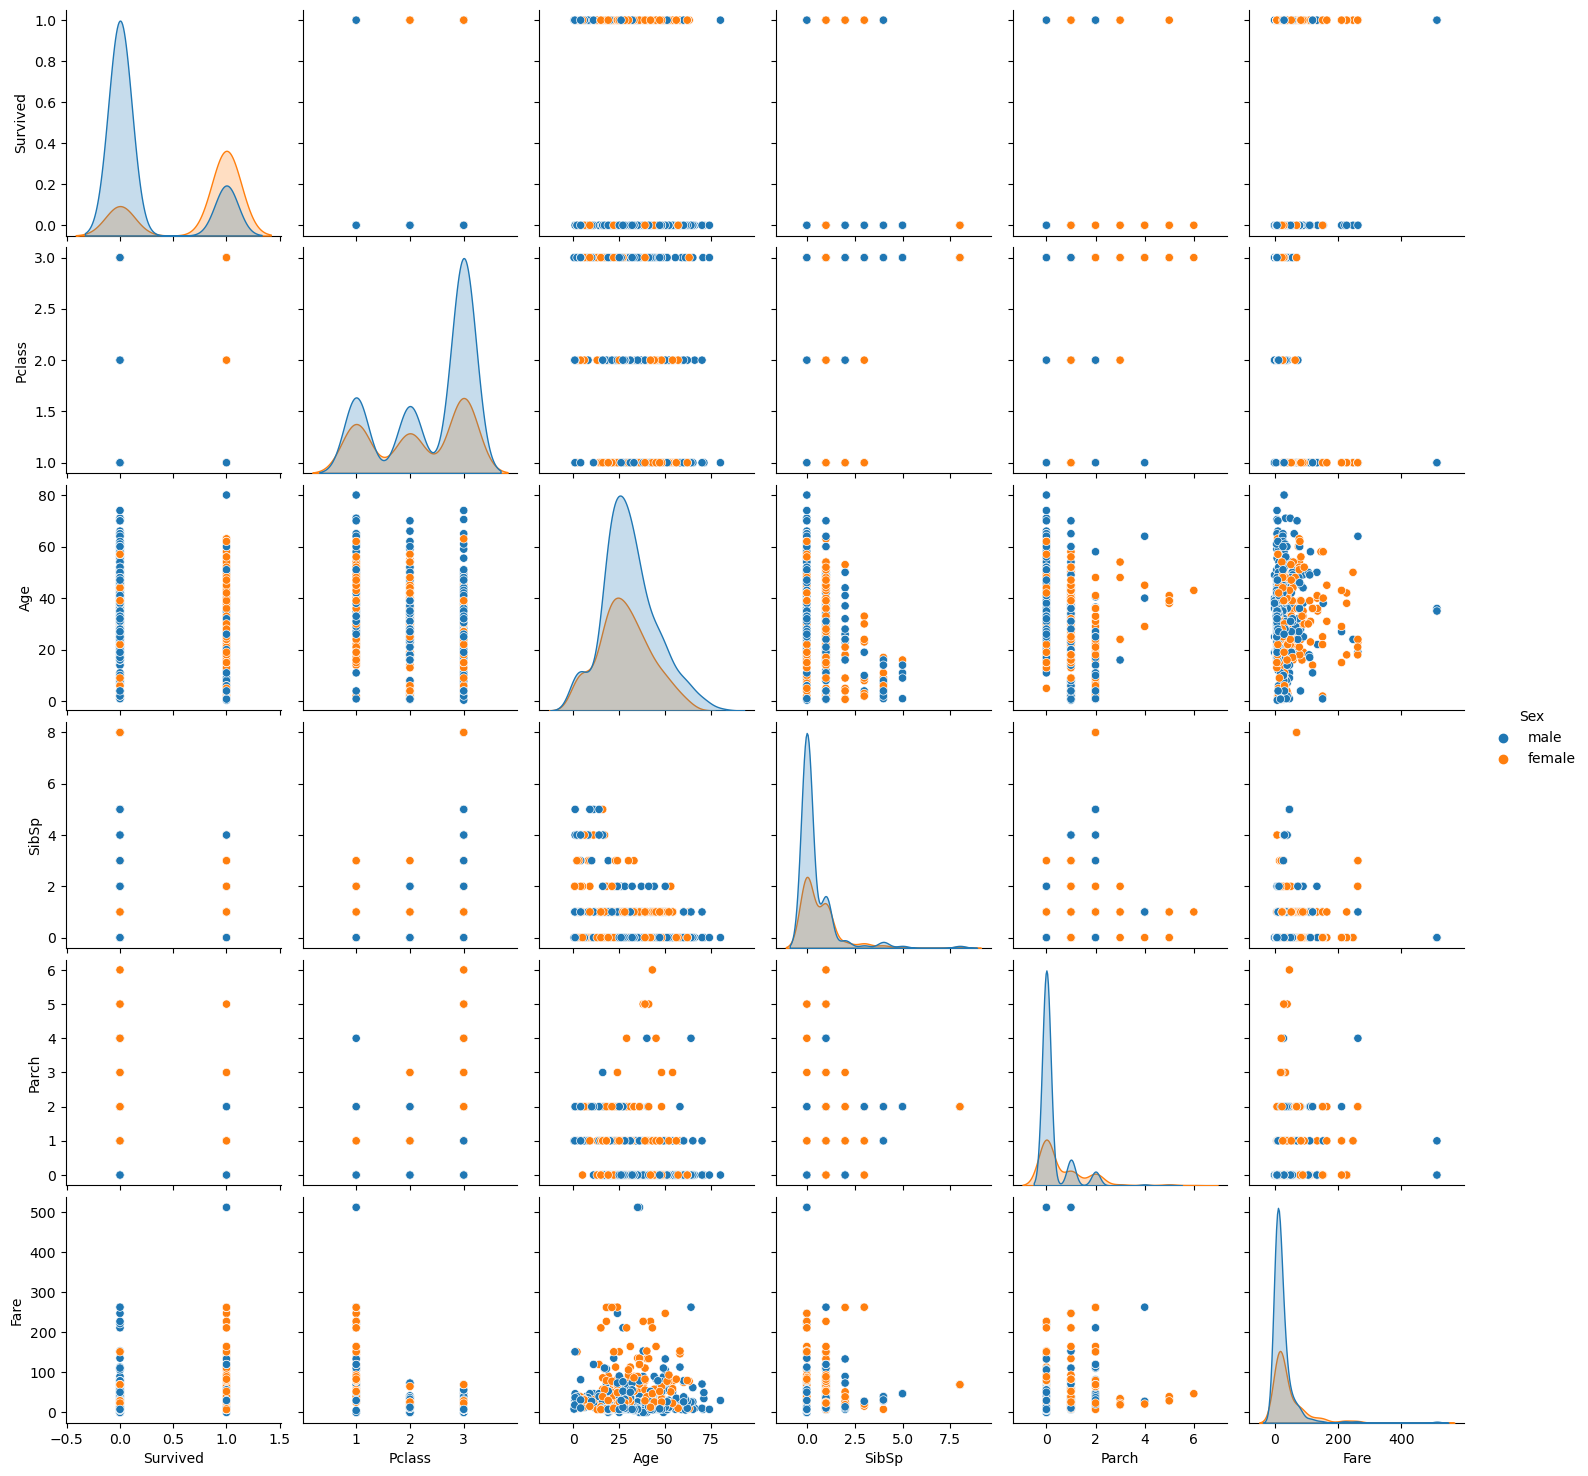

In [11]:
sns.pairplot(data=train.iloc[:, 1:], hue='Sex')
# train.iloc[:, 1:] to ignore the PassengerId

In [12]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


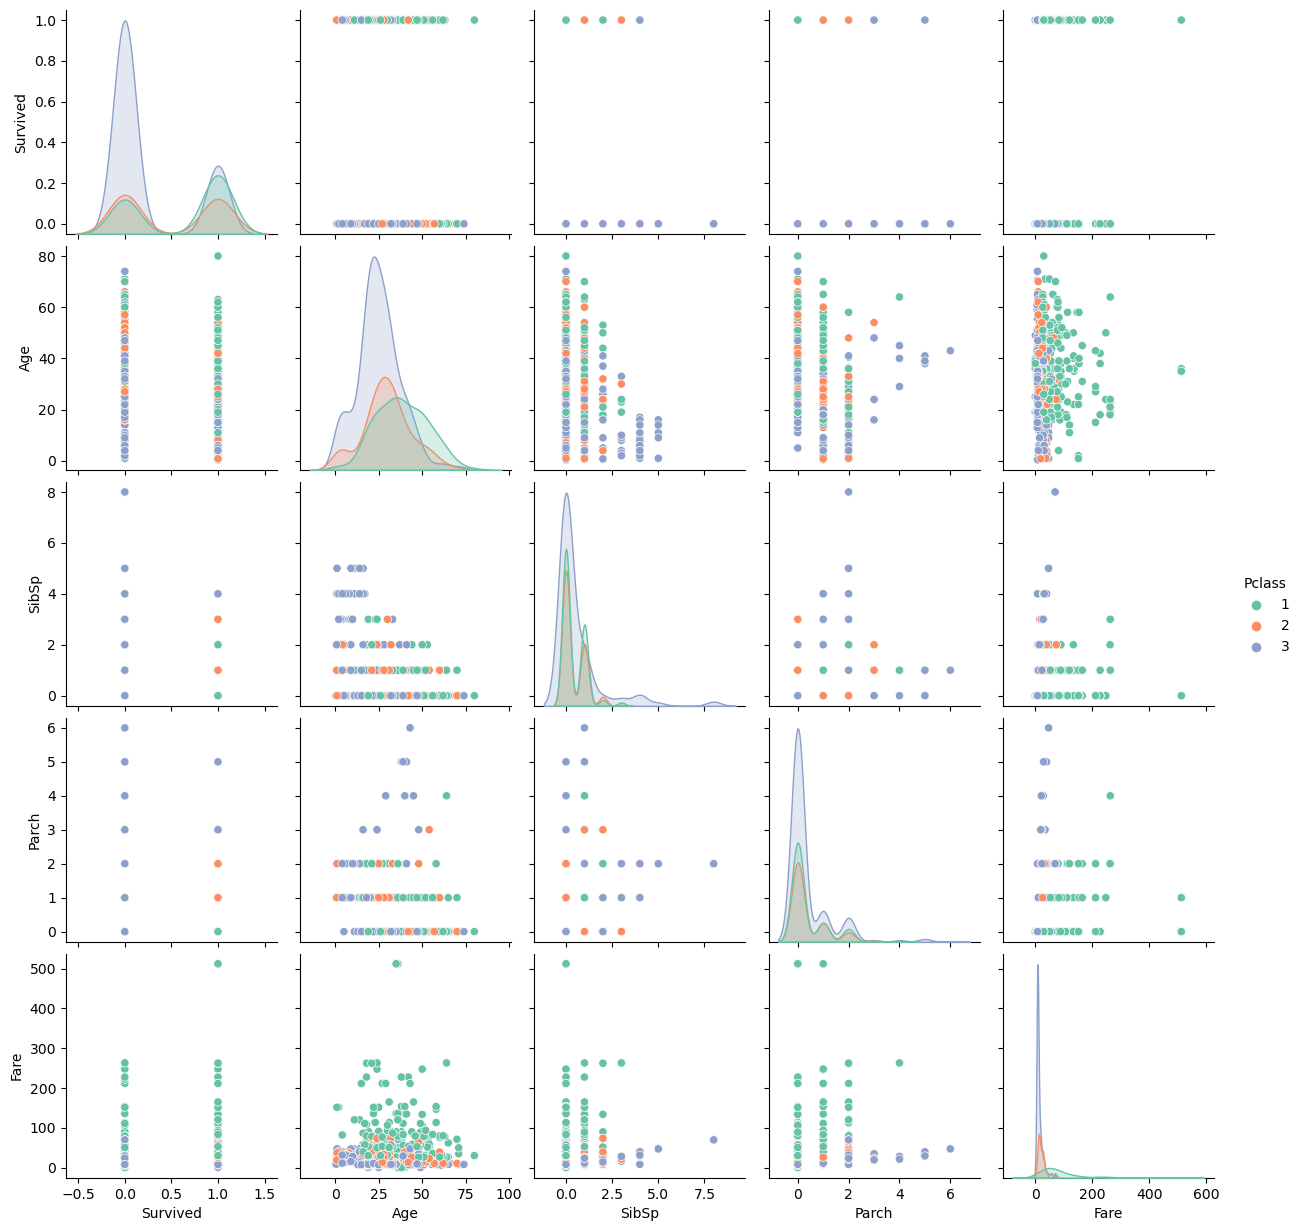

In [13]:
sns.pairplot(data= train.iloc[:, 1:], hue = 'Pclass', palette='Set2')

### correlation
Correlation is a statistical technique that measures the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation (i.e., as one variable increases, the other variable decreases), 0 indicates no correlation, and 1 indicates a perfect positive correlation (i.e., as one variable increases, the other variable increases).

The sign of the correlation coefficient indicates the direction of the relationship between the variables. A positive correlation coefficient indicates a positive relationship, meaning that as one variable increases, the other variable tends to increase as well. A negative correlation coefficient indicates a negative relationship, meaning that as one variable increases, the other variable tends to decrease.

It's important to note that correlation does not imply causation. A high correlation between two variables does not necessarily mean that one variable causes the other variable to change. Other factors, such as confounding variables, may be responsible for the observed correlation. Therefore, it's important to carefully interpret the results of a correlation analysis and consider other factors that may be influencing the relationship between the variables.

a confounding variable is any variable that is related to both the independent variable (the variable being manipulated) and the dependent variable (the variable being measured). Confounding variables can introduce bias into the study, making it difficult to determine the true causal relationship between the independent and dependent variables
* [Correlation wikik](https://en.wikipedia.org/wiki/Correlation)
* https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression


<AxesSubplot:>

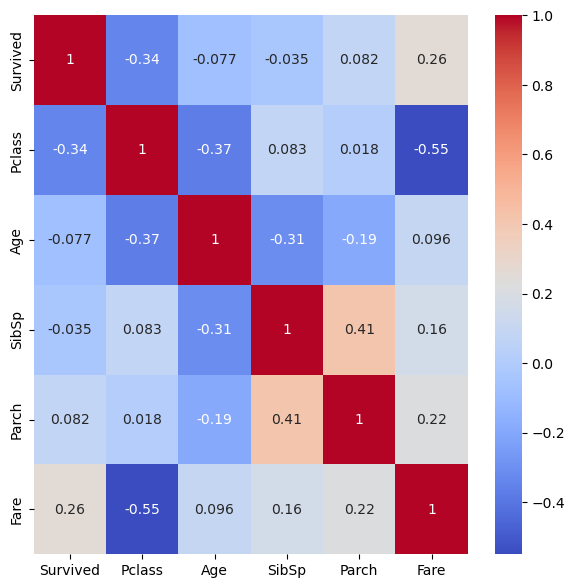

In [14]:
# let's viual the correlation
corr = train.drop('PassengerId', axis=1).corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [15]:
# we can note that some features are correlated with each other
# Surived correlated with Fare positivly 0.26 means increase of the fare would increase the survival chance 20%
# Surived correlated with Pclass negativly -0.34 means lower the class would lower the survival chance 34%
# Pclass aslo correlated with Age (➖0.3️7) 🌟
# Pclass correlated with Fare alot (➖ 0.55) 🌟
# Age with SibSp negativly (make sence if you too young children for example you more likly to have a parent or brother/sister)
# Age with Parch
# 💡 note we would need this information that Age is correlated with ['Pclass', 'Parch', 'Sibsp']

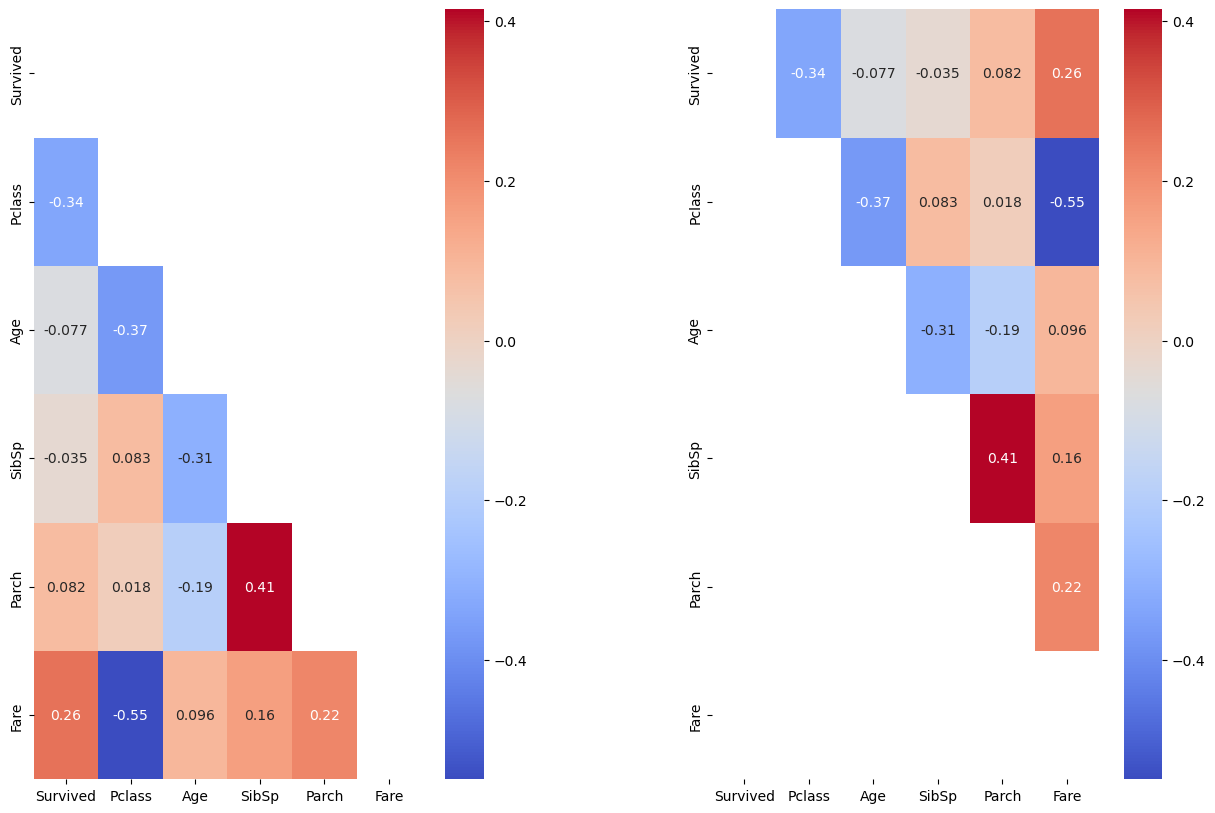

In [16]:
# let's play with this correlation map
# you noted that each row in the above full heatmap is just a cpoy of the column 
# i_th Row = j_th Col
# so we can show the info once if we want to 
'''
np.triu() returns the upper triangle of an array, while np.tril() returns the lower triangle of an array. 
These functions can be used to create a boolean mask for an array, 
where the upper or lower triangle of the array is set to True and the rest of the elements are set to False. 
'''
''' 
np.triu(m, k=0)
np.tril(m, k=0)
Here, m is the input array, and k is an optional parameter that specifies which diagonal to consider when creating the mask.
 By default, k=0, which means the main diagonal is used. 
 A positive value of k means the diagonal above the main diagonal is used, 
 while a negative value of k means the diagonal below the main diagonal is used.
'''
mask_up = np.triu(np.ones_like(corr, dtype=bool))
mask_down = np.tril(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(1, 2, figsize =(15,10))
sns.heatmap(corr, cmap='coolwarm', mask=mask_up, annot=True, ax=axs[0])
sns.heatmap(corr, cmap='coolwarm', mask=mask_down, annot=True, ax=axs[1])
fig.subplots_adjust(wspace=0.4)

<AxesSubplot:>

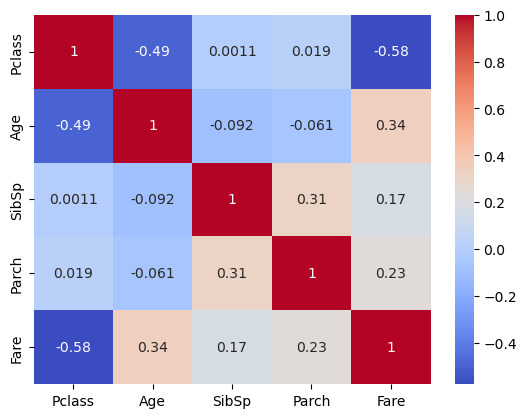

In [17]:
# fast 👀 look to the test set
# Age is correlated with ['Pclass', 'Fare']
# here the Parch and the SipSp effect is less than what we find in the train data🤔👀 
sns.heatmap(data=test.drop('PassengerId', axis=1).corr(), annot=True, cmap='coolwarm')

In [18]:
# what if we combined the data 
# to furture study the correlation of the whole data without correltion with the survival 

In [19]:
combo = pd.concat([train.drop(columns=['PassengerId', 'Survived'], axis=1), test.drop('PassengerId', axis=1)])
combo.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

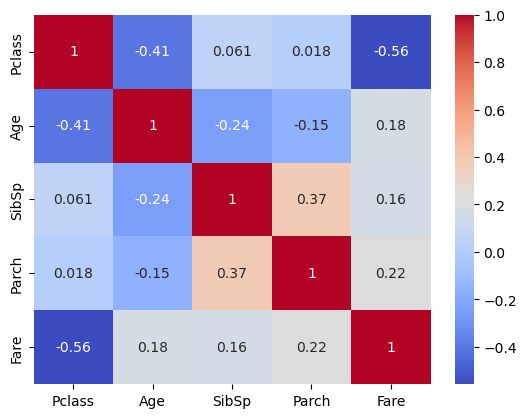

In [20]:
sns.heatmap(combo.corr(), annot=True, cmap='coolwarm')
# we now sure that Age is good correlation with ['Pclass', 'SibSp', 'Fare', 'Parch']
# why we spend that time to make sure of the features correlated with age 
# beacuse we can use them to guess the missing values

<AxesSubplot:xlabel='Age', ylabel='Count'>

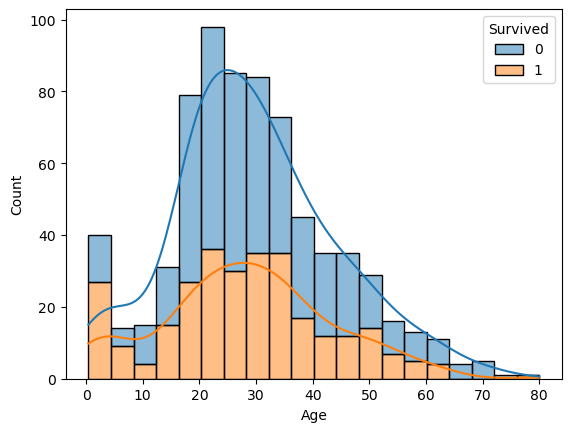

In [21]:
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', kde=True)
# Age and surivival 

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

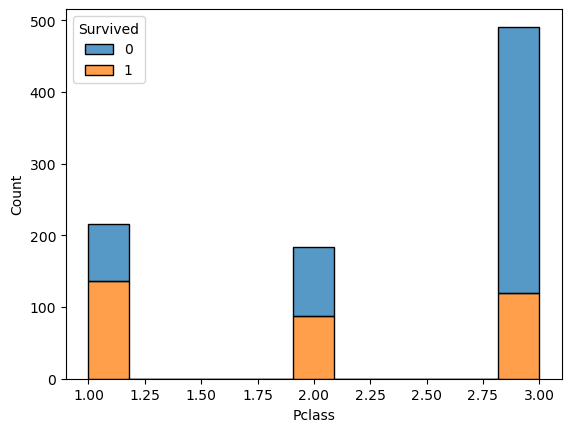

In [22]:
sns.histplot(data=train, x='Pclass', hue='Survived', multiple='stack')
# class 3 with the largest casualites 💀 

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

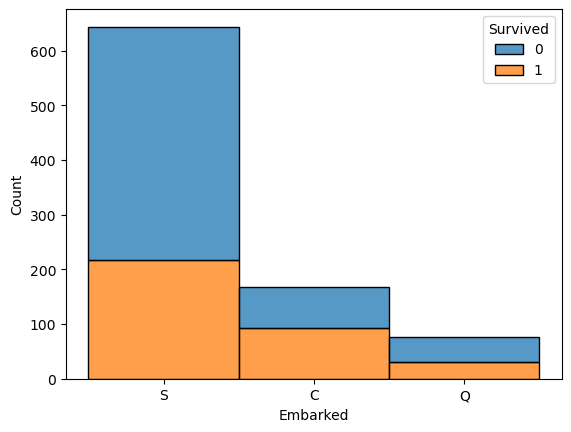

In [23]:
sns.histplot(data=train, x='Embarked', hue='Survived', multiple='stack')

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Concolusion and what we should do 🤔 ?
1. Dealing with missing values
    * Age 
      - 177 in train and 86 in test missing values ---use---> simple regression model to fill the values by using the correlated features
    * Embarked
      - 2 missing values ----use---> mode 
    * Fare (test)
      - only one missing value ----use---> median
    * Cabin 
      - we would drop it❌
2. Features to be dropped
    * Cabin
    * Ticket (no use of it)
    * PassengerId (we don't need it in the train)
    * SibSp, Parach if we merge them into new feature related to the family 
    * Name if we get the Title from it 
3. Feature engineering 
   * Features to create
     - Age intervals
     - Fare intervals
     - Titel
     - Family ===> isAlone
4. Prepare the data to be input for a model
    * Categorical to be Encodes
      - Sex 
      - Embarked
    * Split the data to 
      - ```X_train```, ```Y_train```, ```X_test```
5. Models

  
     


## Dealing with the missing values

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
# 1️⃣ Embarked 2 missing in the train
train.Embarked.fillna('S', inplace=True)

In [28]:
# 2️⃣ Fare in the test set
test.Fare.fillna(test.Fare.median(), inplace=True)

### Filling the missing Age values using a regression model

In [29]:
# 3️⃣ Age 
# hmm let's build a simple model to help us fill the missing data

# select features with no missing values and the feature to fill
# X = df.loc[df['C'].notnull(), ['A', 'B']] => features that are correlated
# y = df.loc[df['C'].notnull(), 'C'] => feature want to guess
x, y = [], []
# combine is [train, test]
for data in combine:
    x.append(data.loc[data['Age'].notnull(), ['Pclass', 'SibSp', 'Fare', 'Parch']])
    y.append(data.loc[data['Age'].notnull(), 'Age'])

from sklearn.tree import DecisionTreeRegressor as TreeR
# let's fit the model
model = TreeR()
model.fit(pd.concat(x), pd.concat(y))

# fill in missing values
for data in combine:
    missing = data['Age'].isnull()
    if missing.sum() > 0:
        data.loc[missing, 'Age'] = model.predict(data.loc[missing, ['Pclass', 'SibSp', 'Fare', 'Parch']])

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Dropping the useless features

In [32]:
to_drop = ['Cabin', 'Ticket']
for  data in combine:
    data.drop(to_drop, axis=1, inplace=True)
    display(data.head(3))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q


## Feature engineering

```REGEX EXPRESSIOM```
https://www.w3schools.com/python/python_regex.asp


| Character | Description | Example |
| --- | --- | --- |
| \A | Returns a match if the specified characters are at the beginning of the string | "\AThe" |
| \b | Returns a match where the specified characters are at the beginning or at the end of a word(the "r" in the beginning is making sure that the string is being treated as a "raw string") | r"\bain"r"ain\b" |
| \B | Returns a match where the specified characters are present, but NOT at the beginning (or at the end) of a word(the "r" in the beginning is making sure that the string is being treated as a "raw string") | r"\Bain"r"ain\B" |
| \d | Returns a match where the string contains digits (numbers from 0-9) | "\d" |
| \D | Returns a match where the string DOES NOT contain digits | "\D" |
| \s | Returns a match where the string contains a white space character | "\s" |
| \S | Returns a match where the string DOES NOT contain a white space character | "\S" |
| \w | Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character) | "\w" |
| \W | Returns a match where the string DOES NOT contain any word characters | "\W" |
| \Z | Returns a match if the specified characters are at the end of the string | "Spain\Z" |

| Set | Description |
| --- | --- |
| [arn] | Returns a match where one of the specified characters (a, r, or n) is present |
| [a-n] | Returns a match for any lower case character, alphabetically between a and n |
| [^arn] | Returns a match for any character EXCEPT a, r, and n |
| [0123] | Returns a match where any of the specified digits (0, 1, 2, or 3) are present |
| [0-9] | Returns a match for any digit between 0 and 9 |
| [0-5][0-9] | Returns a match for any two-digit numbers from 00 and 59 |
| [a-zA-Z] | Returns a match for any character alphabetically between a and z, lower case OR upper case |
| [+] | In sets, +, *, ., |, (), $,{} has no special meaning, so [+] means: return a match for any + character in the string |

In [33]:
# Title out of the name
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
for data in combine:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
pd.crosstab(test['Title'], test['Sex'])


Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [35]:
# let's make the non common titles of the same meaning to more common one
for data in combine:
    data['Title'] = data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
# combine all the minority titles into a Rare title
# create a list of titles to keep
keep_titles = ['Mr', 'Miss', 'Mrs', 'Master']

# replace all titles not in the 'keep_titles' list with 'Rare'
for dataset in combine:
    dataset['Title'] = dataset['Title'].where(dataset['Title'].isin(keep_titles), other='Rare')
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [37]:
# let's drop ❌ the Name no need for it now
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [38]:
for data in combine:
    data.drop('Name', axis=1, inplace=True)
    display(data.head(3))


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr


In [39]:
# let's combine the Parch and SibSp into new feature
for data in combine:
     # adding one as this feature represent if the size of the family members on board
     # if he is alone so the size would be 1 
     data['Family'] = data['SibSp'] + data['Parch'] + 1
     display(data.head(3))



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1


In [40]:
for data in combine:
    data.drop(['SibSp','Parch'], axis=1, inplace=True)
    display(data.head(3))

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,male,22.0,7.2500,S,Mr,2
1,2,1,1,female,38.0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,7.9250,S,Miss,1


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,892,3,male,34.5,7.8292,Q,Mr,1
1,893,3,female,47.0,7.0000,S,Mrs,2
2,894,2,male,62.0,9.6875,Q,Mr,1


In [41]:
# is he Alone? and replacing famly size with isAlone
for data in combine:
    data['IsAlone'] = 0
    data.loc[data['Family'] == 1, 'IsAlone'] = 1



In [42]:
train[ ['IsAlone', 'Survived'] ].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [43]:
for data in combine:
    data.drop('Family', axis=1, inplace=True)
    display(data.head(3))

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,male,22.0,7.2500,S,Mr,0
1,2,1,1,female,38.0,71.2833,C,Mrs,0
2,3,1,3,female,26.0,7.9250,S,Miss,1


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,male,34.5,7.8292,Q,Mr,1
1,893,3,female,47.0,7.0000,S,Mrs,0
2,894,2,male,62.0,9.6875,Q,Mr,1


## Prepare the Data
### Encode the categorical data

In [44]:
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [45]:
for d in combine:
    d.Sex = d.Sex.map({'male': 0, 'female' : 1})
    d.Embarked = d.Embarked.map({'S': 0, 'Q' : 1, 'C': 2})
    d.Title = d.Title.map({'Mr': 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Rare': 4 })
    display(d.head(3))

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,7.2500,0,0,0
1,2,1,1,1,38.0,71.2833,2,2,0
2,3,1,3,1,26.0,7.9250,0,1,1


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,7.8292,1,0,1
1,893,3,1,47.0,7.0000,0,2,0
2,894,2,0,62.0,9.6875,1,0,1


In [46]:
# Fare intervals
train['Fare_int'] = pd.qcut(train['Fare'], 4)
train[ ['Fare_int', 'Survived'] ].groupby(['Fare_int'], as_index=False).mean().sort_values(by='Fare_int', ascending=False)

,Fare_int,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [47]:
# Fare intervals
test['Fare_int'] = pd.qcut(test['Fare'], 4)


In [48]:
for data in combine:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)
    data.drop(['Fare_int'], axis=1, inplace=True)
    display(data.head(3))


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,0,0,0,0
1,2,1,1,1,38.0,3,2,2,0
2,3,1,3,1,26.0,1,0,1,1


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,0,1,0,1
1,893,3,1,47.0,0,0,2,0
2,894,2,0,62.0,1,1,0,1


<AxesSubplot:xlabel='Age', ylabel='Count'>

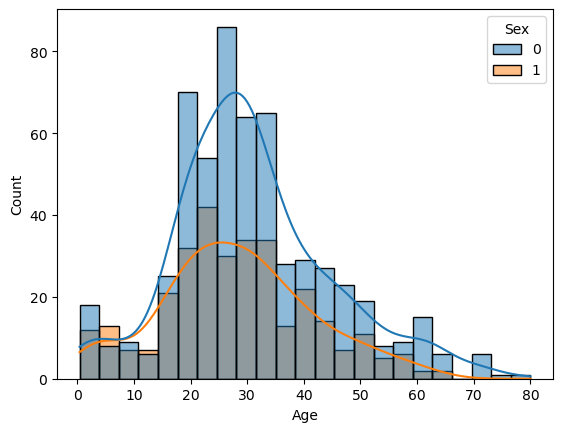

In [49]:
sns.histplot(data=train, x='Age', hue='Sex', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

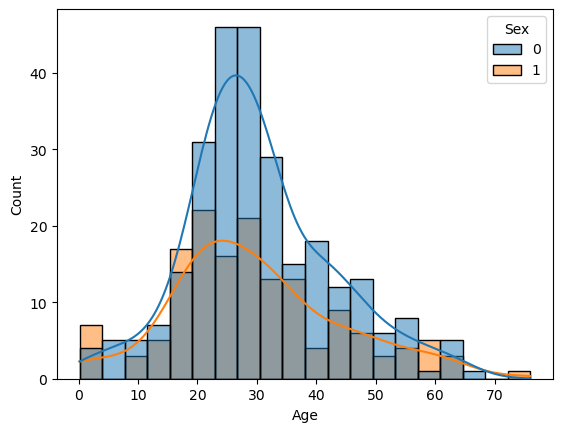

In [50]:
sns.histplot(data=test, x='Age', hue='Sex', kde=True)

In [51]:
# Age
train['Age_int'] = pd.qcut(train['Age'], 5)
train[['Age_int', 'Survived']].groupby(['Age_int'], as_index=False).mean().sort_values(by='Age_int', ascending=True)


,Age_int,Survived
0,"(0.419, 19.0]",0.451087
1,"(19.0, 26.0]",0.360215
2,"(26.0, 31.0]",0.297619
3,"(31.0, 40.0]",0.448864
4,"(40.0, 80.0]",0.355932


In [52]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    display(dataset.head(3))


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_int
0,1,0,3,0,1.0,0,0,0,0,"(19.0, 26.0]"
1,2,1,1,1,2.0,3,2,2,0,"(31.0, 40.0]"
2,3,1,3,1,1.0,1,0,1,1,"(19.0, 26.0]"


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,0,1,0,1
1,893,3,1,2.0,0,0,2,0
2,894,2,0,3.0,1,1,0,1


In [53]:
train.drop('Age_int', axis=1, inplace=True)
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1.0,0,0,0,0
1,2,1,1,1,2.0,3,2,2,0
2,3,1,3,1,1.0,1,0,1,1


## Spliting the data

In [54]:
X_train = train.drop(["Survived", "PassengerId"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [55]:
from sklearn.ensemble import RandomForestClassifier as RFC 
model = RFC(random_state=42)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(model.score(X_train, Y_train))


0.8709315375982043


In [56]:
from sklearn.tree import DecisionTreeClassifier as TreeC
t = TreeC(random_state=42)
t.fit(X_train, Y_train)
pred_tree = model.predict(X_test)
print(t.score(X_train, Y_train))


0.8709315375982043


In [57]:
solution = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived": pred
    })

In [58]:
solution.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [59]:
solution.to_csv('/kaggle/working/sol.csv', index=False)